In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CC GENERAL.csv')
df.drop('CUST_ID', axis=1, inplace=True)
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df = df.dropna(axis = 0, subset = ['CREDIT_LIMIT'])

In [61]:
import numpy as np
import matplotlib.pyplot as plt

class PCA():

    def __init__(self, n_components=0.95):
        self.n_components = n_components
        if self.n_components > 1:
            self.type = 'var'
        else:
            self.type = 'ratio'
        self.components = None  # Initialize components as None

    def fit(self, X):
        # Step One: mean and variance for ==> (standardization)
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        self.variance = np.var(X, axis=0)


        # Step Two: Standardize the data
        X_standardized = (X - self.mean) / self.std

        # Step Three: cov matrix
        cov_matrix = np.cov(X_standardized.T)
        print(cov_matrix.shape)

        # Step Four: eigenvalues & eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # Info Percentage for each principle component
        percent_var = eigenvalues / np.sum(eigenvalues)

        # Cumulative SUM
        cum_percent_var = np.cumsum(percent_var)

        if self.type == 'var':
            no_of_components = self.n_components
        else:
            no_of_components = np.argmax(cum_percent_var >= self.n_components) 
#             print(no_of_components)

        self.components = eigenvectors[:, :no_of_components]

        X_new = X_standardized @ self.components

        return X_new

    def transform(self, Z):
        Z_standardized = (Z - self.mean) / self.std

        Z_new = Z_standardized @ self.components

        return Z_new

    def plot_explained_variance(self):
        explained_var = np.cumsum(self.variance) / np.sum(self.variance)
        plt.plot(explained_var)
        plt.xlabel('Number of Principal Components')
        plt.ylabel('Explained Variance')
        plt.title('Explained Variance vs. Number of Principal Components')
        plt.show()


In [62]:
pca_section = PCA(n_components=0.95)
X_transofmed = pca_section.fit(df.values)

(17, 17)


In [63]:
print(pca_section.components.shape)
print("expected shape: (17,5)")

(17, 11)
expected shape: (17,5)


In [64]:
pca_section.transform(df.values).shape

(8949, 11)

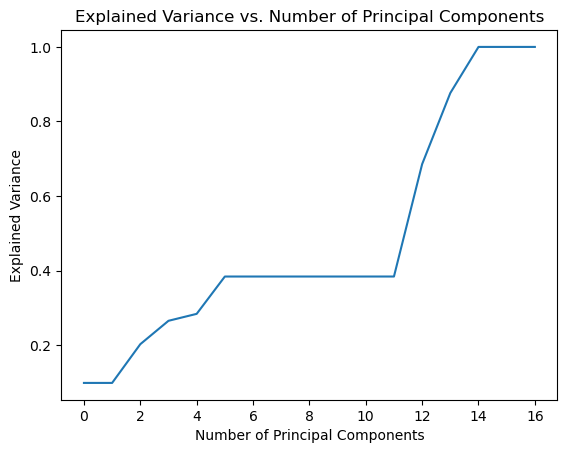

In [65]:
pca_section.plot_explained_variance()